# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="../images/icon102.png" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 03: Training Data & Feature views</span>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/logicalclocks/hopsworks-tutorials/blob/master/bitcoin/3_feature_views_and_training_dataset.ipynb)

<span style="font-width:bold; font-size: 1.4rem;">This is the third part of advanced tutorials about Hopsworks Feature Store. This notebook explains how to read from a feature group and create training dataset within the feature store</span>

## 🗒️ In this notebook you will see how to create a training dataset from the feature groups: 

1. Retrieving Feature Groups.
2. Defining Transformation functions.
4. Feature View creation.
5. Training Dataset with training, validation and test data.

![part2](../images/02_training-dataset.png) 

### <span style="color:#ff5f27;"> 📝 Imports</span>

In [1]:
import pandas as pd

import datetime

import warnings
warnings.filterwarnings('ignore')

## <span style="color:#ff5f27;"> 📡 Connecting to Hopsworks Feature Store </span>

In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1152


Connected. Call `.close()` to terminate connection gracefully.


---

## <span style="color:#ff5f27;">🪝 Retrieving Feature Groups </span>

In [39]:
btc_price_fg = fs.get_or_create_feature_group(
    name='bitcoin_price',
    version=1
)

btc_price_fg.read().head(3)

2022-09-29 21:49:36,077 INFO: USE `romantest1_featurestore`
2022-09-29 21:49:37,103 INFO: SELECT `fg0`.`date` `date`, `fg0`.`open` `open`, `fg0`.`high` `high`, `fg0`.`low` `low`, `fg0`.`close` `close`, `fg0`.`volume` `volume`, `fg0`.`quote_av` `quote_av`, `fg0`.`trades` `trades`, `fg0`.`tb_base_av` `tb_base_av`, `fg0`.`tb_quote_av` `tb_quote_av`, `fg0`.`unix` `unix`, `fg0`.`mean_7_days` `mean_7_days`, `fg0`.`mean_14_days` `mean_14_days`, `fg0`.`mean_56_days` `mean_56_days`, `fg0`.`signal` `signal`, `fg0`.`std_7_days` `std_7_days`, `fg0`.`exp_mean_7_days` `exp_mean_7_days`, `fg0`.`exp_std_7_days` `exp_std_7_days`, `fg0`.`momentum_7_days` `momentum_7_days`, `fg0`.`rate_of_change_7_days` `rate_of_change_7_days`, `fg0`.`strength_index_7_days` `strength_index_7_days`, `fg0`.`std_14_days` `std_14_days`, `fg0`.`exp_mean_14_days` `exp_mean_14_days`, `fg0`.`exp_std_14_days` `exp_std_14_days`, `fg0`.`momentum_14_days` `momentum_14_days`, `fg0`.`rate_of_change_14_days` `rate_of_change_14_days`, `

,date,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,...,exp_std_14_days,momentum_14_days,rate_of_change_14_days,strength_index_14_days,std_56_days,exp_mean_56_days,exp_std_56_days,momentum_56_days,rate_of_change_56_days,strength_index_56_days
0,2021-05-19,42849.78,43584.90,30000.00,36690.09,354347.243161,1.347769e+10,6331062,168271.347308,6.410033e+09,...,7145.935949,-20746.02,-34.939358,22.604282,5181.686686,53342.806492,6061.282277,-15613.56,-28.470684,44.222282
1,2021-12-08,50588.95,51200.00,48600.00,50471.19,38425.924660,1.925459e+09,1118225,18126.843620,9.084107e+08,...,4120.300702,-6667.10,-14.398097,35.586600,4388.713351,56447.953603,6174.286106,-6895.81,-11.991276,47.825775
2,2021-04-06,59129.99,59495.24,57413.02,57991.15,54201.000727,3.166912e+09,1960513,26699.197872,1.560539e+09,...,2136.553924,3650.26,10.874002,56.123736,4588.611750,54941.025412,4414.871106,11570.73,29.422633,59.928617


In [40]:
tweets_textblob_fg = fs.get_or_create_feature_group(
    name='bitcoin_tweets_textblob',
    version=1
)

tweets_textblob_fg.show(3)

2022-09-29 21:49:41,865 INFO: USE `romantest1_featurestore`
2022-09-29 21:49:42,879 INFO: SELECT `fg0`.`date` `date`, `fg0`.`subjectivity` `subjectivity`, `fg0`.`polarity` `polarity`, `fg0`.`unix` `unix`
FROM `romantest1_featurestore`.`bitcoin_tweets_textblob_1` `fg0`


,date,subjectivity,polarity,unix
0,2021-05-19 00:00:00,0.000000,0.000000,1621375200000
1,2021-12-08 00:00:00,0.000000,0.000000,1638914400000
2,2021-04-06 00:00:00,1114.342144,380.316299,1617660000000


In [41]:
tweets_vader_fg = fs.get_or_create_feature_group(
    name='bitcoin_tweets_vader',
    version=1
)

tweets_vader_fg.show(3)

2022-09-29 21:49:46,927 INFO: USE `romantest1_featurestore`
2022-09-29 21:49:47,903 INFO: SELECT `fg0`.`date` `date`, `fg0`.`compound` `compound`, `fg0`.`unix` `unix`
FROM `romantest1_featurestore`.`bitcoin_tweets_vader_1` `fg0`


,date,compound,unix
0,2021-05-19 00:00:00,0.0000,1621375200000
1,2021-12-08 00:00:00,0.0000,1638914400000
2,2021-04-06 00:00:00,646.5593,1617660000000


--- 

## <span style="color:#ff5f27;"> 🖍 Feature View Creation and Retrieving </span>

In [42]:
final_df

,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,unix,...,strength_index_14_days,std_56_days,exp_mean_56_days,exp_std_56_days,momentum_56_days,rate_of_change_56_days,strength_index_56_days,subjectivity,polarity,compound
0,19288.57,19316.14,18805.34,18920.50,239496.56746,4.568928e+09,3907636,120501.30570,2.298980e+09,1663970400000,...,41.050760,1798.851126,20556.688442,1596.848718,0.00,-18.772850,0.000000,2.929545,1.236364,-0.4297
1,19401.63,19500.00,18531.42,19289.91,385886.91829,7.330336e+09,5906265,194842.08772,3.701395e+09,1663884000000,...,43.393706,0.000000,20625.890131,1592.965300,0.00,0.000000,0.000000,8.131728,1.814836,1.3411
2,18874.31,19956.00,18125.98,18461.36,385034.10021,7.338668e+09,6907777,190299.47143,3.628362e+09,1663711200000,...,35.946446,0.000000,20737.577677,1612.607278,0.00,0.000000,0.000000,4.831750,1.555750,2.7372
3,18921.99,19180.21,18629.20,18807.38,191191.44920,3.625137e+09,3714450,94989.39646,1.801230e+09,1664056800000,...,40.332623,1809.705319,20486.092234,1602.430141,-4485.94,-19.170655,40.992233,5.335476,0.001825,-0.8352
4,19078.10,19790.00,18471.28,19412.82,521385.45547,9.964460e+09,7357437,260944.38118,4.988233e+09,1664316000000,...,46.316533,1811.372888,20342.896891,1560.210747,-3405.55,-14.189819,42.529903,8.002118,3.750354,5.1259
5,19226.68,20385.86,18816.32,19079.13,593260.74161,1.170577e+10,8152473,296727.71059,5.856646e+09,1664229600000,...,43.161525,1812.655631,20381.397969,1580.307998,-3908.66,-16.386972,41.735544,9.428977,3.290846,6.1473
6,18461.36,19550.17,18356.39,19401.63,379321.72111,7.203741e+09,6251862,190987.32145,3.627124e+09,1663797600000,...,44.100549,0.000000,20682.731792,1601.581399,0.00,0.000000,0.000000,2.998512,0.786066,1.5785
7,18809.13,19318.96,18680.72,19227.82,439239.21943,8.356952e+09,5837041,220623.29914,4.198006e+09,1664143200000,...,44.237252,1808.341707,20435.578748,1589.528209,-4040.19,-16.356379,41.989541,4.606190,2.187738,2.3028
8,19412.82,19645.52,18843.01,19321.16,327694.94420,6.340825e+09,4546630,164040.48246,3.174515e+09,1664402400000,...,45.568291,1812.900081,20302.471221,1542.100949,-3301.82,-17.120745,42.368349,4.839610,0.998431,2.5912


In [43]:
# Query Preparation
fg_query = btc_price_fg.select_except(["date"]).join(tweets_textblob_fg.select(["subjectivity","polarity"])).join(tweets_vader_fg.select("compound"))

final_df = fg_query.read()

2022-09-29 21:50:05,977 INFO: USE `romantest1_featurestore`
2022-09-29 21:50:06,972 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`open` `open`, `fg2`.`high` `high`, `fg2`.`low` `low`, `fg2`.`close` `close`, `fg2`.`volume` `volume`, `fg2`.`quote_av` `quote_av`, `fg2`.`trades` `trades`, `fg2`.`tb_base_av` `tb_base_av`, `fg2`.`tb_quote_av` `tb_quote_av`, `fg2`.`unix` `unix`, `fg2`.`mean_7_days` `mean_7_days`, `fg2`.`mean_14_days` `mean_14_days`, `fg2`.`mean_56_days` `mean_56_days`, `fg2`.`signal` `signal`, `fg2`.`std_7_days` `std_7_days`, `fg2`.`exp_mean_7_days` `exp_mean_7_days`, `fg2`.`exp_std_7_days` `exp_std_7_days`, `fg2`.`momentum_7_days` `momentum_7_days`, `fg2`.`rate_of_change_7_days` `rate_of_change_7_days`, `fg2`.`strength_index_7_days` `strength_index_7_days`, `fg2`.`std_14_days` `std_14_days`, `fg2`.`exp_mean_14_days` `exp_mean_14_days`, `fg2`.`exp_std_14_days` `exp_std_14_days`, `fg2`.`momentum_14_days` `momentum_14_days`, `fg2`.`rate_of_change_14_days` `rate_of_chang

(484, 35)

In [44]:
final_df.shape

(484, 35)

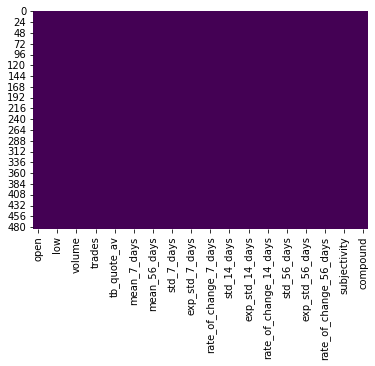

NUMBER OF NULL VALUES PER COLUMN:
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_av                  0
trades                    0
tb_base_av                0
tb_quote_av               0
unix                      0
mean_7_days               0
mean_14_days              0
mean_56_days              0
signal                    0
std_7_days                0
exp_mean_7_days           0
exp_std_7_days            0
momentum_7_days           0
rate_of_change_7_days     0
strength_index_7_days     0
std_14_days               0
exp_mean_14_days          0
exp_std_14_days           0
momentum_14_days          0
rate_of_change_14_days    0
strength_index_14_days    0
std_56_days               0
exp_mean_56_days          0
exp_std_56_days           0
momentum_56_days          0
rate_of_change_56_days    0
strength_index_56_days    0
subjectivity              0
polarity                  0
compound      

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis')
plt.show()
print("\033[4mNUMBER OF NULL VALUES PER COLUMN:\033[0m")
print(final_df.isnull().sum())
cols_with_nan = final_df.columns[final_df.isna().any()].tolist()

In [45]:
columns_to_transform = final_df.columns
columns_to_transform = columns_to_transform.tolist()
columns_to_transform.remove("unix")

In [46]:
len(columns_to_transform)

34

In [47]:
# Load the transformation functions.
min_max_scaler = fs.get_transformation_function(name="min_max_scaler")

# Map features to transformation functions.
transformation_functions = {col: min_max_scaler for col in columns_to_transform}

In [51]:
feature_view = fs.create_feature_view(
    name='bitcoin_feature_view',
    version=1,
    transformation_functions=transformation_functions,
    query=fg_query
)

Feature view created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1152/fs/1100/fv/bitcoin_feature_view/version/1


---

## <span style="color:#ff5f27;"> 🏋️ Training Dataset Creation</span>
---

### <span style="color:#ff5f27;">🪓 TimeSeriesSplit</span>

### It doesnt work for me, so will pass this step.

In [52]:
from datetime import datetime
date_format = "%Y-%m-%d %H:%M:%S"

In [53]:
# Create training datasets based event time filter
start_time = int(float(datetime.strptime("2021-02-05 10:00:00", date_format).timestamp()) * 1000)
end_time = int(float(datetime.strptime("2022-01-01 23:59:59", date_format).timestamp()) * 1000)


td_train_version, td_job = feature_view.create_training_data(
        start_time = start_time,
        end_time = end_time,    
        description = 'transactions fraud online training dataset jan/feb',
        data_format = "csv",
        coalesce = True,
        write_options = {'wait_for_job': True},
    )

Training dataset job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1152/jobs/named/bitcoin_feature_view_1_1_create_fv_td_29092022195141/executions


In [54]:
# Create training datasets based event time filter
start_time = int(float(datetime.strptime("2022-01-02 00:00:00", date_format).timestamp()) * 1000)
end_time = int(float(datetime.strptime("2022-04-30 23:59:59", date_format).timestamp()) * 1000)

td_validation_version, td_job = feature_view.create_training_data(
        start_time = start_time,
        end_time = end_time,    
        description = 'transactions fraud online training dataset jan/feb',
        data_format = "csv",
        coalesce = True,
        write_options = {'wait_for_job': True},
    )

Training dataset job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1152/jobs/named/bitcoin_feature_view_1_2_create_fv_td_29092022195352/executions


In [55]:
# Create training datasets based event time filter
start_time = int(float(datetime.strptime("2022-05-01 00:00:00", date_format).timestamp()) * 1000)
end_time = int(float(datetime.strptime("2022-06-04 23:59:59", date_format).timestamp()) * 1000)

td_test_version, td_job = feature_view.create_training_data(
        start_time = start_time,
        end_time = end_time,    
        description = 'transactions fraud online training dataset jan/feb',
        data_format = "csv",
        coalesce = True,
        write_options = {'wait_for_job': True},
    )

Training dataset job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/1152/jobs/named/bitcoin_feature_view_1_3_create_fv_td_29092022195530/executions


---